# SPARK and JAVA on COLAB

In [18]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
#"/content/drive/My Drive/churn.csv"

'/content/drive/My Drive/churn.csv'

In [44]:
#!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [43]:
#!wget -q https://archive.apache.org/dist/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz

In [45]:
#!tar xf spark-3.3.1-bin-hadoop3.tgz

In [46]:
#!pip install -q findspark

In [47]:
#!pip install -q spark

In [49]:
#!pip install -q pyspark

In [48]:
#import os
#os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
#os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"

In [50]:
#import findspark
#findspark.init()

In [51]:
#findspark.find()

'/content/spark-3.3.1-bin-hadoop3'

In [53]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()
sc=spark.sparkContext

In [56]:
sc

<SparkContext master=local appName=Colab>

In [57]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 4050 &')
!curl -s http://localhost:4040/api/tunnels

--2023-01-15 11:04:50--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.237.133.81, 52.202.168.65, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.237.133.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  18.0MB/s    in 0.7s    

2023-01-15 11:04:51 (18.0 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
{"tunnels":[],"uri":"/api/tunnels"}


# Reading and Handling Data with Spark

In [60]:
df = spark.read.csv("churn.csv", header=True,sep=",", inferSchema=True)

In [61]:
df.cache()

DataFrame[_c0: int, Names: string, Age: double, Total_Purchase: double, Account_Manager: int, Years: double, Num_Sites: double, Churn: int]

In [63]:
df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [64]:
df.count()

900

In [66]:
df.columns

['_c0',
 'Names',
 'Age',
 'Total_Purchase',
 'Account_Manager',
 'Years',
 'Num_Sites',
 'Churn']

In [67]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Churn: integer (nullable = true)



In [68]:
df=df.withColumnRenamed("_c0","index")
#_c0 replaced with index

In [73]:
df.groupBy("Names").count().sort("count",ascending=False).show()

+------------------+-----+
|             Names|count|
+------------------+-----+
|     Jennifer Wood|    2|
|      Patrick Bell|    1|
|     Chelsea Marsh|    1|
|  Patrick Robinson|    1|
| Mr. Jerome Dawson|    1|
|       John Barber|    1|
|       Amber Evans|    1|
|     David Compton|    1|
|    Brittany Green|    1|
|        Lisa Davis|    1|
|     Maria Stanley|    1|
|Alexandra Phillips|    1|
|     Nicholas Levy|    1|
|    Richard Farmer|    1|
|     Linda Hubbard|    1|
|    Jesse Mitchell|    1|
|  Timothy Johnston|    1|
|   Charles Whitney|    1|
|    Tony Schneider|    1|
|  Stefanie Miranda|    1|
+------------------+-----+
only showing top 20 rows



In [74]:
df.filter(df.Names=="Jennifer Wood").show() #different person

+-----+-------------+----+--------------+---------------+-----+---------+-----+
|index|        Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+-----+-------------+----+--------------+---------------+-----+---------+-----+
|   22|Jennifer Wood|35.0|       9381.12|              1| 6.78|     11.0|    1|
|  439|Jennifer Wood|48.0|      11585.16|              0| 4.61|      9.0|    0|
+-----+-------------+----+--------------+---------------+-----+---------+-----+



In [75]:
df.distinct().count() #all data is difeerent

900

In [79]:
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
index,900,449.5,259.95191863111916,0,899
Names,900,None,None,Aaron King,Zachary Walsh
Age,900,41.81666666666667,6.127560416916251,22.0,65.0
Total_Purchase,900,10062.82403333334,2408.644531858096,100.0,18026.01
Account_Manager,900,0.4811111111111111,0.4999208935073339,0,1
Years,900,5.27315555555555,1.274449013194616,1.0,9.15
Num_Sites,900,8.587777777777777,1.7648355920350969,3.0,14.0
Churn,900,0.16666666666666666,0.3728852122772358,0,1


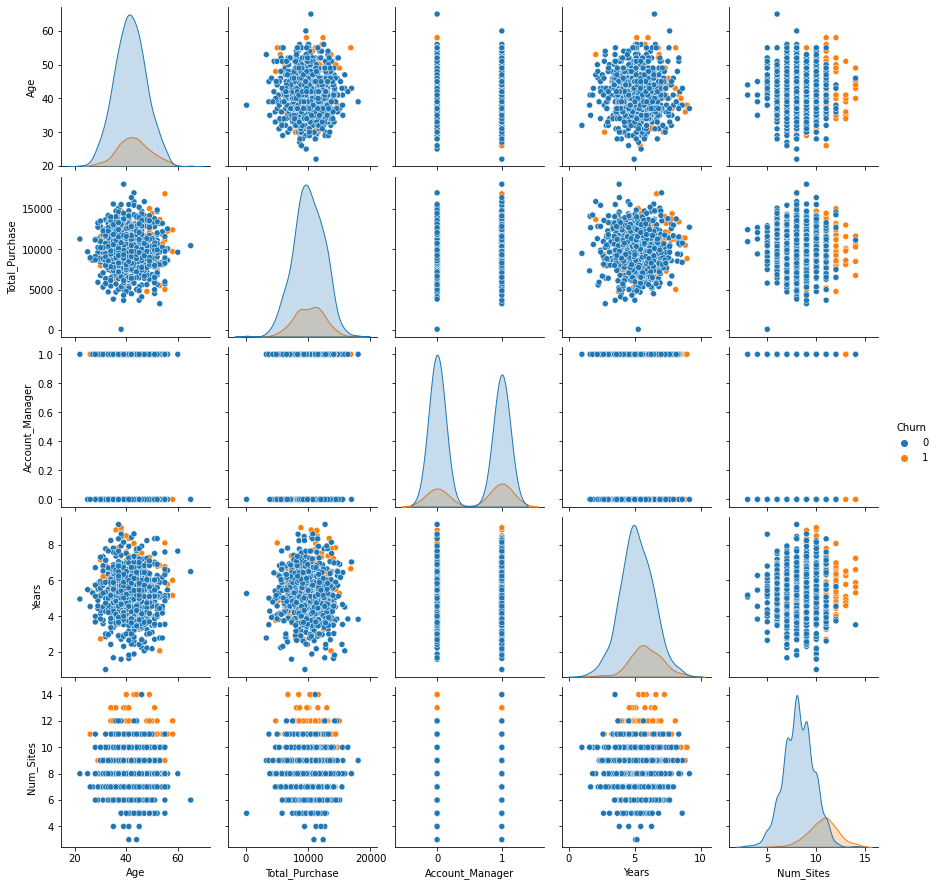

In [81]:
import seaborn as sns
pd_df=df.drop("index","names").toPandas()
sns.pairplot(pd_df,hue="Churn");

In [95]:
df=df.dropna()

In [97]:
df.count()

900

In [99]:
df.columns

['index',
 'Names',
 'Age',
 'Total_Purchase',
 'Account_Manager',
 'Years',
 'Num_Sites',
 'Churn']

In [104]:
df.show()

+-----+-------------------+----+--------------+---------------+-----+---------+-----+
|index|              Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+-----+-------------------+----+--------------+---------------+-----+---------+-----+
|    0|   Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|    1|      Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|    2|        Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|    3|      Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|    4|     Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
|    5|   Jessica Williams|48.0|      10356.02|              0| 5.12|      8.0|    1|
|    6|        Eric Butler|44.0|      11331.58|              1| 5.23|     11.0|    1|
|    7|      Zachary Walsh|32.0|       9885.12|              1| 6.92|      9.0|    1|
|    8|        Ashlee Carr|43.0|       14062.6|       

In [111]:
pd_df.Churn.value_counts()

0    750
1    150
Name: Churn, dtype: int64

# Model GBTClassifier from Pyspark

In [112]:
#Set dependend variable 
from pyspark.ml.feature import StringIndexer #StringIndexer bu iki niteliği sayacak ve en çok tekrarlanana 0 diğerine 1 verecek. 
stringIndexer=StringIndexer(inputCol="Churn",outputCol="label")

In [113]:
indexed=stringIndexer.fit(df).transform(df)

In [114]:
indexed.dtypes

[('index', 'int'),
 ('Names', 'string'),
 ('Age', 'double'),
 ('Total_Purchase', 'double'),
 ('Account_Manager', 'int'),
 ('Years', 'double'),
 ('Num_Sites', 'double'),
 ('Churn', 'int'),
 ('label', 'double')]

In [115]:
df=indexed.withColumn("label",indexed.label.cast("integer"))

In [116]:
df.dtypes

[('index', 'int'),
 ('Names', 'string'),
 ('Age', 'double'),
 ('Total_Purchase', 'double'),
 ('Account_Manager', 'int'),
 ('Years', 'double'),
 ('Num_Sites', 'double'),
 ('Churn', 'int'),
 ('label', 'int')]

In [122]:
# Set independent variables
from pyspark.ml.feature import VectorAssembler #Birden çok sütunu bir vektör sütununda birleştiren bir özellik dönüştürücü.
columns=[
 'Age',
 'Total_Purchase',
 'Account_Manager',
 'Years',
 'Num_Sites']

In [123]:
vectorAssembler=VectorAssembler(inputCols=columns,outputCol="features")

In [124]:
vect_columns=vectorAssembler.transform(df)

In [125]:
final_df=vect_columns.select("features","label")
final_df.show()


+--------------------+-----+
|            features|label|
+--------------------+-----+
|[42.0,11066.8,0.0...|    1|
|[41.0,11916.22,0....|    1|
|[38.0,12884.75,0....|    1|
|[42.0,8010.76,0.0...|    1|
|[37.0,9191.58,0.0...|    1|
|[48.0,10356.02,0....|    1|
|[44.0,11331.58,1....|    1|
|[32.0,9885.12,1.0...|    1|
|[43.0,14062.6,1.0...|    1|
|[40.0,8066.94,1.0...|    1|
|[30.0,11575.37,1....|    1|
|[45.0,8771.02,1.0...|    1|
|[45.0,8988.67,1.0...|    1|
|[40.0,8283.32,1.0...|    1|
|[41.0,6569.87,1.0...|    1|
|[38.0,10494.82,1....|    1|
|[45.0,8213.41,1.0...|    1|
|[43.0,11226.88,0....|    1|
|[53.0,5515.09,0.0...|    1|
|[46.0,8046.4,1.0,...|    1|
+--------------------+-----+
only showing top 20 rows



In [126]:
final_df.printSchema()


root
 |-- features: vector (nullable = true)
 |-- label: integer (nullable = true)



In [130]:
splits=final_df.randomSplit([0.7,0.2])

In [131]:
train_df=splits[0]
test_df=splits[1]

In [132]:
train_df.count(),test_df.count()

(689, 211)

In [133]:
from pyspark.ml.classification import GBTClassifier

In [134]:
gbm=GBTClassifier(maxIter=10,featuresCol="features",labelCol="label")

In [136]:
model=gbm.fit(train_df)

In [137]:
y_pred=model.transform(test_df)

In [138]:
y_pred.show(2)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[22.0,11254.38,1....|    0|[1.27668493280017...|[0.92779957926467...|       0.0|
|[29.0,12711.15,0....|    0|[0.28107778592165...|[0.63695115116162...|       0.0|
+--------------------+-----+--------------------+--------------------+----------+
only showing top 2 rows



In [142]:
acc=y_pred.select("label","prediction")
acc.show()

+-----+----------+
|label|prediction|
+-----+----------+
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    1|       0.0|
|    0|       0.0|
|    0|       0.0|
|    1|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    1|       1.0|
|    0|       0.0|
|    0|       0.0|
+-----+----------+
only showing top 20 rows



In [143]:
acc.filter(acc.label==acc.prediction).count()/acc.count() #accuracy

0.8957345971563981